In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [3]:
df = pd.read_csv('CH_Clustering.csv')

In [4]:
train = pd.read_csv('CH_Clustering.csv')

In [5]:
train.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,rev_Range,...,eqpdays,asl_flag1,refurb1,creditcd1,Customer_ID,churn,servicetime,store_long,store_lat,selection
0,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,153.14,...,240,0,1,1,1000002,0,4/1/2017 15:21,-122.280685,47.523026,chosen
1,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,0.00,...,1504,0,1,1,1000003,1,1/4/2017 19:49,-122.342000,47.609535,chosen
2,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,0.00,...,1812,0,1,1,1000004,0,1/4/2017 19:41,-122.313020,47.668995,chosen
3,82.2750,1312.25,75.000,1.2375,0.00,0.0,0.0,0.0,0.0,15.42,...,458,0,1,1,1000006,0,1/4/2017 19:42,-122.294020,47.716457,chosen
4,17.1450,0.00,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,0.31,...,852,0,1,1,1000007,1,1/4/2017 19:46,-122.338250,47.610245,chosen


In [6]:
print(train.columns.values)

['rev_Mean' 'mou_Mean' 'totmrc_Mean' 'da_Mean' 'ovrmou_Mean' 'ovrrev_Mean'
 'vceovr_Mean' 'datovr_Mean' 'roam_Mean' 'rev_Range' 'mou_Range'
 'totmrc_Range' 'da_Range' 'ovrmou_Range' 'ovrrev_Range' 'vceovr_Range'
 'datovr_Range' 'roam_Range' 'change_mou' 'change_rev' 'drop_vce_Mean'
 'drop_dat_Mean' 'blck_vce_Mean' 'blck_dat_Mean' 'unan_vce_Mean'
 'unan_dat_Mean' 'plcd_vce_Mean' 'plcd_dat_Mean' 'recv_vce_Mean'
 'recv_sms_Mean' 'comp_vce_Mean' 'comp_dat_Mean' 'custcare_Mean'
 'ccrndmou_Mean' 'cc_mou_Mean' 'inonemin_Mean' 'threeway_Mean'
 'mou_cvce_Mean' 'mou_cdat_Mean' 'mou_rvce_Mean' 'owylis_vce_Mean'
 'mouowylisv_Mean' 'iwylis_vce_Mean' 'mouiwylisv_Mean' 'peak_vce_Mean'
 'peak_dat_Mean' 'mou_peav_Mean' 'mou_pead_Mean' 'opk_vce_Mean'
 'opk_dat_Mean' 'mou_opkv_Mean' 'mou_opkd_Mean' 'drop_blk_Mean'
 'attempt_Mean' 'complete_Mean' 'callfwdv_Mean' 'callwait_Mean'
 'drop_vce_Range' 'drop_dat_Range' 'blck_vce_Range' 'blck_dat_Range'
 'unan_vce_Range' 'unan_dat_Range' 'plcd_vce_Range' 'plcd_da

In [7]:
print(train.isna().sum())

rev_Mean       0
mou_Mean       0
totmrc_Mean    0
da_Mean        0
ovrmou_Mean    0
              ..
churn          0
servicetime    0
store_long     0
store_lat      0
selection      0
Length: 129, dtype: int64


In [8]:
train[['income','churn']].groupby(['income'], as_index=False).mean().sort_values(by="churn", ascending=False)

,income,churn
6,7,0.527459
2,3,0.501840
7,8,0.495186
8,9,0.492063
5,6,0.491846
4,5,0.483063
3,4,0.482724
0,1,0.463244
1,2,0.451429


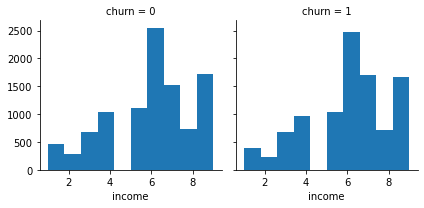

In [9]:
g = sns.FacetGrid(train, col='churn')
g.map(plt.hist,"income")

In [10]:
train[['churn','eqpdays']].groupby(['churn'], as_index=False).mean().sort_values(by="eqpdays", ascending=False)

,churn,eqpdays
1,1,562.715817
0,0,476.599881


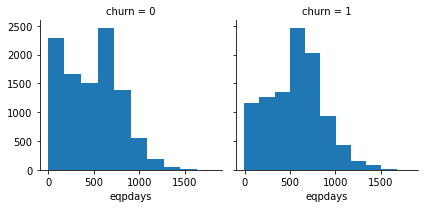

In [11]:
g = sns.FacetGrid(train, col='churn')
g.map(plt.hist,"eqpdays")

In [12]:
train[['churn','refurb1']].groupby(['churn'], as_index=False).mean().sort_values(by="refurb1", ascending=False)

,churn,refurb1
0,0,0.853046
1,1,0.826456


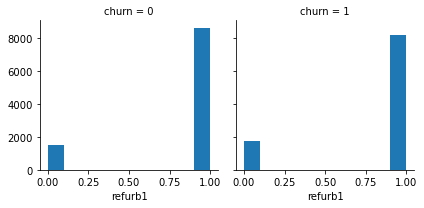

In [13]:
g = sns.FacetGrid(train, col='churn')
g.map(plt.hist,"refurb1")

In [83]:
train[['churn','uniqsubs']].groupby(['churn'], as_index=False).mean().sort_values(by="uniqsubs", ascending=False)

,churn,uniqsubs
1,1,1.583738
0,0,1.553204


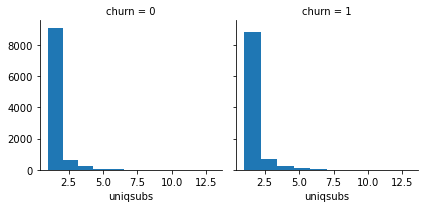

In [84]:
g = sns.FacetGrid(train, col='churn')
g.map(plt.hist,"uniqsubs")

In [85]:
train[['churn','creditcd1']].groupby(['churn'], as_index=False).mean().sort_values(by="creditcd1", ascending=False)

,churn,creditcd1
1,1,0.931230
0,0,0.930281


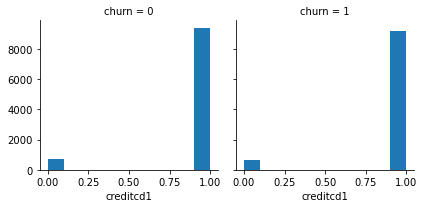

In [86]:
g = sns.FacetGrid(train, col='churn')
g.map(plt.hist,"creditcd1")

In [87]:
df.columns.values

array(['blck_dat_Mean', 'blck_vce_Mean', 'drop_dat_Mean', 'drop_vce_Mean'],
      dtype=object)

In [88]:
used = ["blck_dat_Mean", "blck_vce_Mean", "drop_dat_Mean", "drop_vce_Mean" ]
df= df[used]

In [20]:
print(df.isna().sum())

blck_dat_Mean    0
blck_vce_Mean    0
drop_dat_Mean    0
drop_vce_Mean    0
dtype: int64


In [89]:
X = np.array(df)

In [90]:
kmeans = KMeans(n_clusters =2, random_state=10)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=10)

In [91]:
print(kmeans.cluster_centers_)

[[4.90809172e-02 1.74968732e+01 8.05381846e-02 2.03666856e+01]
 [8.66180582e-03 2.02132559e+00 1.95530216e-02 3.56742138e+00]]


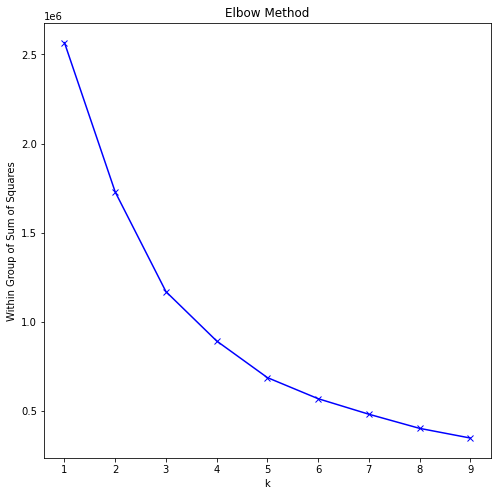

In [92]:
wgss = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wgss.append(kmeans.inertia_)
    
plt.figure(figsize=(8,8))
plt.plot(K, wgss, 'bx-')
plt.xlabel('k')
plt.ylabel('Within Group of Sum of Squares')
plt.title('Elbow Method')
plt.show()

In [25]:
kmeans = KMeans(n_clusters=5, random_state=10)
kmeans.fit(X)
y_std = kmeans.predict(X)
print(kmeans.cluster_centers_)

[[3.83318001e-03 1.64259430e+00 1.02072108e-02 2.18121085e+00]
 [6.07164541e-03 3.05140660e+00 7.17466100e-02 1.31201174e+01]
 [2.51082251e-01 9.28008658e+01 6.92640693e-02 1.44935065e+01]
 [1.62790698e-02 8.25581395e+00 1.12403101e-01 3.92937984e+01]
 [1.42371730e-01 2.23282365e+01 5.40265036e-02 6.60006796e+00]]


In [26]:
from collections import Counter
print(Counter(kmeans.labels_))

Counter({0: 15217, 1: 3294, 4: 981, 3: 431, 2: 77})


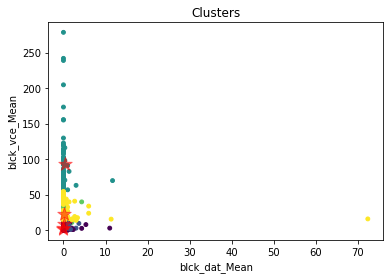

In [27]:
plt.scatter(X[:, 0], X[:, 1], c=y_std, s=15)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:,1], c='red', s=200, alpha=.5, marker="*");
plt.title('Clusters')
plt.xlabel('blck_dat_Mean')
plt.ylabel('blck_vce_Mean')
plt.show()


In [28]:
from scipy import stats
z = np.abs(stats.zscore(df))
df_o = df[(z < 3).all(axis=1)]

In [73]:
df.shape

(20000, 4)

In [74]:
df_o.shape

(19273, 4)

In [31]:
X = np.array(df_o)
kmeans = KMeans(n_clusters=5, random_state=10)
kmeans.fit(X)
y_std = kmeans.predict(X)
print(kmeans.cluster_centers_)

[[1.24691895e-03 8.54487458e-01 3.39277947e-03 1.42780919e+00]
 [2.47463499e-03 3.30512249e+00 2.27666419e-02 1.81608513e+01]
 [2.63579027e-03 1.53628918e+00 1.56264709e-02 7.96309894e+00]
 [5.28114321e-03 7.41472507e+00 6.52376514e-03 3.49425287e+00]
 [1.70250896e-02 1.82594086e+01 1.12007168e-02 7.47670251e+00]]


In [32]:
print(Counter(kmeans.labels_))

Counter({0: 11488, 2: 3541, 3: 2150, 1: 1347, 4: 747})


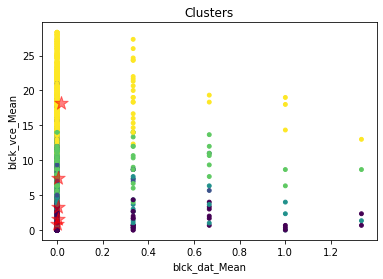

In [33]:
plt.scatter(X[:, 0], X[:, 1], c=y_std, s=15)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:,1], c='red', s=200, alpha=.5, marker="*");
plt.title('Clusters')
plt.xlabel('blck_dat_Mean')
plt.ylabel('blck_vce_Mean')
plt.show()

In [68]:
from sklearn.decomposition import PCA
pca = PCA(2)
X_pca = pca.fit_transform(df_o)
X_pca.shape

(19273, 2)

In [69]:
kmeans = KMeans(n_clusters=5, random_state=10)
kmeans.fit(X_pca)
y_pca = kmeans.predict(X_pca)
print(kmeans.cluster_centers_)

[[-3.26966046 -0.40355881]
 [13.05653942 -4.91686035]
 [ 2.99160456 -2.41803005]
 [ 1.34365597  4.85353974]
 [ 9.37473908 13.15929455]]


In [70]:
print(Counter(kmeans.labels_))

Counter({0: 11539, 2: 3544, 3: 2116, 1: 1343, 4: 731})


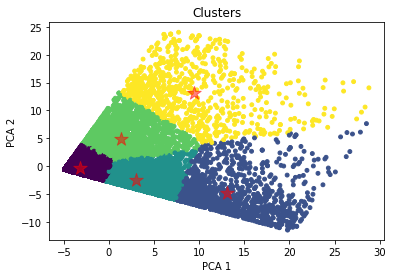

In [71]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pca, s=15)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:,1], c='red', s=200, alpha=.5, marker="*");
plt.title('Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [55]:
used2 = ['churn']
df2 = train[used2]
y = np.array(df2)


In [93]:
from sklearn.metrics import accuracy_score
kmeans = KMeans(n_clusters = 2, random_state = 10)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=10)

In [94]:
from sklearn import metrics


y_x = kmeans.predict(X)
print('Accuracy is:', metrics.accuracy_score(y, y_x))

Accuracy is: 0.50395


In [95]:
X_minmax = MinMaxScaler().fit_transform(X)
kmeans.fit(X_minmax)

y_minmax = kmeans.predict(X_minmax)
print("Accuracy: ", metrics.accuracy_score(y, y_minmax))

Accuracy:  0.49685


In [98]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
kmeans.fit(X_std)

y_std = kmeans.predict(X_std)
print("Accuracy is:", metrics.accuracy_score(y, y_std))

Accuracy is: 0.50565


In [100]:
dbscan = cluster.DBSCAN(eps=.8, min_samples = 5)
dbscan.fit(X_minmax)

correct = 0
for i in range(len(X_minmax)):
    predict_me = np.array(X_minmax[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = dbscan.labels_.astype(np.int)
    if prediction[0] == y[i]:
        correct += 1 
print("Accuracy:", correct/len(X_minmax))

Accuracy: 0.5056


In [62]:
from sklearn.metrics import silhouette_score
from sklearn import cluster
data = [X]
val_eps = [.1, .2, .3, .4]


for dat in data:
    print("\n")
    for i in val_eps:
        dbscan = cluster.DBSCAN(eps=i, min_samples = 5)
        dbscan.fit(dat)
        
        n_clusters_ = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
        
        sil_avg = silhouette_score(dat, dbscan.labels_)
        print('eps value: ' + str(i), ', # of clusters: %d' % n_clusters_, ', silhouette score:', sil_avg)



eps value: 0.1 , # of clusters: 598 , silhouette score: 0.6750442118178882
eps value: 0.2 , # of clusters: 598 , silhouette score: 0.6750442118178882
eps value: 0.3 , # of clusters: 598 , silhouette score: 0.6750442118178882
eps value: 0.4 , # of clusters: 56 , silhouette score: -0.4633965816088183


In [39]:
dbscan = cluster.DBSCAN(eps= .4, min_samples=3)
dbscan.fit(X)

DBSCAN(eps=0.4, min_samples=3)

In [40]:
core_samples = dbscan.core_sample_indices_
labels = dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0 )

print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 90


In [76]:
data = [X]
val_eps = [.2, .4, .5, .6]
min_sample = [3, 10]


for ms in min_sample:
    print("\n")
    for i in val_eps:
        dbscan = cluster.DBSCAN(eps=i, min_samples = ms)
        dbscan.fit(dat)
        
        n_clusters_ = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
        
        sil_avg = silhouette_score(dat, dbscan.labels_)
        print('eps value: ' + str(i), ', # of clusters: %d' % n_clusters_, ', silhouette score:', sil_avg)



eps value: 0.2 , # of clusters: 974 , silhouette score: 0.7737372600470399
eps value: 0.4 , # of clusters: 90 , silhouette score: -0.02382871188229389
eps value: 0.5 , # of clusters: 68 , silhouette score: -0.05908518578612973
eps value: 0.6 , # of clusters: 69 , silhouette score: -0.0525645726399352


eps value: 0.2 , # of clusters: 334 , silhouette score: 0.5485407617025219
eps value: 0.4 , # of clusters: 20 , silhouette score: 0.1600063130655404
eps value: 0.5 , # of clusters: 19 , silhouette score: 0.33402554711755833
eps value: 0.6 , # of clusters: 19 , silhouette score: 0.334918204678586


In [57]:
for ms in min_sample:
    print("\n")
    for i in val_eps:
        dbscan = cluster.DBSCAN(eps=i, min_samples = ms)
        dbscan.fit(dat)
        
        n_clusters_ = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
        
        sil_avg = silhouette_score(dat, dbscan.labels_)
        print('eps value: ' + str(i), ', # of clusters: %d' % n_clusters_, ', silhouette score:', sil_avg)




eps value: 0.1 , # of clusters: 974 , silhouette score: 0.7737372600470399
eps value: 0.2 , # of clusters: 974 , silhouette score: 0.7737372600470399
eps value: 0.3 , # of clusters: 974 , silhouette score: 0.7737372600470399
eps value: 0.4 , # of clusters: 90 , silhouette score: -0.02382871188229389


eps value: 0.1 , # of clusters: 598 , silhouette score: 0.6750442118178882
eps value: 0.2 , # of clusters: 598 , silhouette score: 0.6750442118178882
eps value: 0.3 , # of clusters: 598 , silhouette score: 0.6750442118178882
eps value: 0.4 , # of clusters: 56 , silhouette score: -0.4633965816088183


eps value: 0.1 , # of clusters: 400 , silhouette score: 0.591444437472963
eps value: 0.2 , # of clusters: 400 , silhouette score: 0.591444437472963
eps value: 0.3 , # of clusters: 400 , silhouette score: 0.591444437472963
eps value: 0.4 , # of clusters: 29 , silhouette score: 0.2062287167722864


eps value: 0.1 , # of clusters: 334 , silhouette score: 0.5485407617025219
eps value: 0.2 , # o



eps value: 0.2 , # of clusters: 974 , silhouette score: 0.7737372600470399
eps value: 0.3 , # of clusters: 974 , silhouette score: 0.7737372600470399
eps value: 0.4 , # of clusters: 90 , silhouette score: -0.02382871188229389
eps value: 0.5 , # of clusters: 68 , silhouette score: -0.05908518578612973
eps value: 0.6 , # of clusters: 69 , silhouette score: -0.0525645726399352


eps value: 0.2 , # of clusters: 334 , silhouette score: 0.5485407617025219
eps value: 0.3 , # of clusters: 334 , silhouette score: 0.5485407617025219
eps value: 0.4 , # of clusters: 20 , silhouette score: 0.1600063130655404
eps value: 0.5 , # of clusters: 19 , silhouette score: 0.33402554711755833
eps value: 0.6 , # of clusters: 19 , silhouette score: 0.334918204678586


In [103]:
data = [X_minmax]
val_eps = [.2, .4, .5, .6]
min_sample = [3, 10]

for ms in min_sample:
    print("\n")
    for i in val_eps:
        dbscan = cluster.DBSCAN(eps=i, min_samples = ms)
        dbscan.fit(dat)
        
        n_clusters_ = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
        
        sil_avg = silhouette_score(dat, dbscan.labels_)
        print('eps value: ' + str(i), ', # of clusters: %d' % n_clusters_, ', silhouette score:', sil_avg)



eps value: 0.2 , # of clusters: 974 , silhouette score: 0.7737372600470399
eps value: 0.4 , # of clusters: 90 , silhouette score: -0.02382871188229389
eps value: 0.5 , # of clusters: 68 , silhouette score: -0.05908518578612973
eps value: 0.6 , # of clusters: 69 , silhouette score: -0.0525645726399352


eps value: 0.2 , # of clusters: 334 , silhouette score: 0.5485407617025219
eps value: 0.4 , # of clusters: 20 , silhouette score: 0.1600063130655404
eps value: 0.5 , # of clusters: 19 , silhouette score: 0.33402554711755833
eps value: 0.6 , # of clusters: 19 , silhouette score: 0.334918204678586


In [ ]:
data = [X_std]
val_eps = [.2, .4, .5, .6]
min_sample = [3, 10]

for ms in min_sample:
    print("\n")
    for i in val_eps:
        dbscan = cluster.DBSCAN(eps=i, min_samples = ms)
        dbscan.fit(dat)
        
        n_clusters_ = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
        
        sil_avg = silhouette_score(dat, dbscan.labels_)
        print('eps value: ' + str(i), ', # of clusters: %d' % n_clusters_, ', silhouette score:', sil_avg)